# <center> Regresión desde la econometría
----
## <center> por Daniel Zúñiga

----
### Desafío 1: Prepare el ambiente de trabajo

#### Importe las librerías básicas para el análisis de datos.
#### Incluya los import base de statsmodels .
#### Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
#### Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .
* tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

$$ Y = b_0 + b_1 * x_1$$

$$ \left( \frac{a}{b} \right) ^{2} $$

In [17]:
#importamos las librerías de siempre
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#importamos el dataframe
df=pd.read_csv("Credit.csv")
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
#eliminamos la columna 'Unnamed: 0' 
df = df.drop(columns='Unnamed: 0')

In [4]:
#inspeccionamos
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [6]:
#definimos la variables categóricas
variables_categoricas = []
for n, i in enumerate(df):
    if df[i].dtypes =="object":
        variables_categoricas.append(i)
variables_categoricas    

['Gender', 'Student', 'Married', 'Ethnicity']

In [7]:
#inspeccionamos la variables categóricas para identificar el grupo minoritario
for i in variables_categoricas:
    print("\n",i)
    print(df[i].value_counts())
    print((df[i].value_counts()/len(df[i])))


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [8]:
#revisamos la variable 'Gender'
df['Gender'][0]

' Male'

In [10]:
#limpiamos la variable 'Gender' de los espacios en blanco
df['Gender'] = df['Gender'].str.strip()

In [11]:
df['Is_Male']= np.where(df['Gender'] == 'Male',1,0 )
df['Is_Student']= np.where(df['Student'] == 'Yes',1,0 )
df['Not_Married']= np.where(df['Married'] == 'No',1,0 )
df['Is_African_American']= np.where(df['Ethnicity'] == 'African American',1,0 )
df['Is_Asian']= np.where(df['Ethnicity'] == 'Asian',1,0 )

In [13]:
#dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'Gender_' + str(x).strip())
#df = df.drop(columns=['Is_Male', 'Is_Student', 'Not_Married', 'Is_AfricanAmerican', 'Is_Asian'])

In [12]:
#verificamos
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Is_Male,Is_Student,Not_Married,Is_African_American,Is_Asian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,1,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,0,0,0


----
### Desafío 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la
media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.

In [14]:
#generamos la función
def plot_hist(dataframe, variable):
    df_temp = dataframe
    sns.distplot(df_temp[variable])
    mean=df_temp[variable].mean()
    median=df_temp[variable].median()
    plt.axvline(mean, color='tomato')
    plt.axvline(median, color='green')
    plt.legend({'Media':mean,'Mediana':median})
    

* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

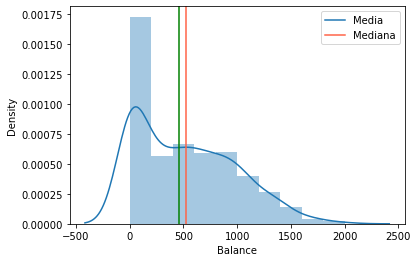

In [18]:
plot_hist(df, 'Balance')

#### <span style="color:blue"> Se observa una distribución bimodal con sesgo positivo (hacia la derecha)

#### <span style="color:blue"></span>

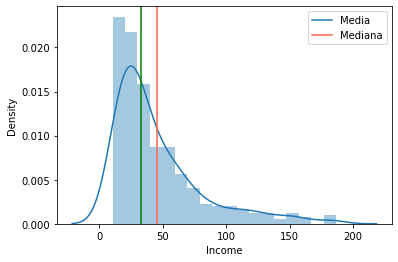

In [19]:
plot_hist(df, 'Income')

#### <span style="color:blue"> Se observa una distribución con sesgo positivo

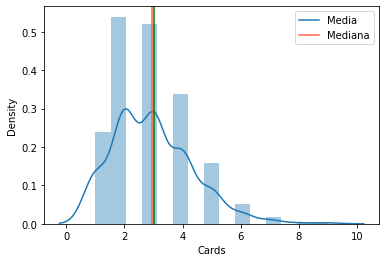

In [20]:
plot_hist(df, 'Cards')

#### <span style="color:blue"> Se observa una distribución bimodal con tenue sesgo positivo

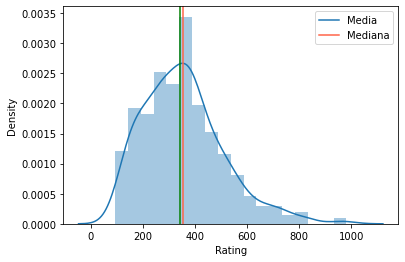

In [21]:
plot_hist(df, 'Rating')

#### <span style="color:blue"> Se observa una distribución con un ligero sesgo positivo

----
### Desafío 3: Regresión Lineal Simple

#### A continuación generaremos una serie de modelos simples:
* $Balance = \beta_{0} + \beta{1} \times Student + \epsilon$
* $Balance = \beta_{0} + \beta{1} \times Income + \epsilon$
* $Balance = \beta_{0} + \beta{1} \times Rating + \epsilon$
#### Utilizando statsmodels , comente brevemente los siguientes puntos:

In [22]:
#Creamos los modelos respectivos
variables = ['Student', 'Income', 'Rating']
modelos = {}
for v in variables:
    modelos[v] = smf.ols('Balance ~ '+v,df).fit()
    print("\n\n")
    print(f"Summary2 Modelo \033[1mBalance ~ {v}\033[0m:\n")
    print(modelos[v].summary2())    




Summary2 Modelo Balance ~ Student:

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.065     
Dependent Variable: Balance          AIC:                6014.9327 
Date:               2022-09-08 21:03 BIC:                6022.9156 
No. Observations:   400              Log-Likelihood:     -3005.5   
Df Model:           1                F-statistic:        28.62     
Df Residuals:       398              Prob (F-statistic): 1.49e-07  
R-squared:          0.067            Scale:              1.9769e+05
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        480.3694  23.4338 20.4990 0.0000 434.2998 526.4390
Student[T.Yes]   396.4556  74.1043  5.3500 0.0000 250.7707 542.1404
-------------------------------------------------------------------
Omnibus:              20.86

#### ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?

#### <span style="color:blue"> La variable que mejor explica la variabilidad de 'Balance' es 'Rating', pues el $R²$ del modelo 'Balance ~ Rating' es de 0.746, notoriamente superior al de los otros 2 modelos.
    
#### <span style="color:blue">No obstante lo expuesto, llama la atención que el coeficiente de 'Student' sea significativamente alto (396.4556), especialmente considerando que hay muy pocos estudiantes (10% del total)

#### ¿Qué podemos decir sobre el comportamiento de Student ?
* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [23]:
#creamos nuestra función para la prueba de hipótesis
def prueba_de_hipotesis(dataframe, variable, binarize):
    df_grupo1 = dataframe[dataframe[binarize]==1]
    df_grupo0 = dataframe[dataframe[binarize]==0]
    tests = stats.ttest_ind(df_grupo1[variable].dropna(),df_grupo0[variable].dropna())
    valor_t = round(tests[0], 6)
    valor_p = round(tests[1], 6)
    media1 = round(df_grupo1[variable].mean(), 2)
    media0 = round(df_grupo0[variable].mean(), 2)
    diferencia_absoluta_medias = round(abs(media0 - media1), 6)
    print(f"\n\033[1mVariable '{variable}'\033[0m, con \033[1mindicador de binarización '{binarize}'\033[0m:")
    print(f"\tMedia grupo 0: {media0}, Media grupo 1: {media1}")
    print(f"\tValor absoluto de la diferencia entre las medias: {diferencia_absoluta_medias}")
    print(f"\tValor t: {valor_t}, Valor p: {valor_p}")

In [24]:
prueba_de_hipotesis(df, 'Balance', 'Is_Student')


Variable 'Balance', con indicador de binarización 'Is_Student':
	Media grupo 0: 480.37, Media grupo 1: 876.82
	Valor absoluto de la diferencia entre las medias: 396.45
	Valor t: 5.349964, Valor p: 0.0


#### <span style="color:blue"> 

#### <span style="color:blue"> Al realizar la prueba de hipótesis comprobamos que existe evidencia estadística para rechazar la hipótesis nula de que los montos de 'balance' de los no estudiantes y de los estudiantes son similares, y en base a este rechazo podemos aceptar la hipótesis alternativa de que los valores de 'balance' (promedio de las deudas en tarjetas de crédito) de los estudiantes y no estudiantes son significativamente diferentes.

----
### Desafío 4: Genere un modelo que incluya todos los regresores
$$Balance_{i} = \beta_{0} + \sum_j^N\beta_{j}\times X_{ij} + \epsilon_{i}$$

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               400 non-null    float64
 1   Limit                400 non-null    int64  
 2   Rating               400 non-null    int64  
 3   Cards                400 non-null    int64  
 4   Age                  400 non-null    int64  
 5   Education            400 non-null    int64  
 6   Gender               400 non-null    object 
 7   Student              400 non-null    object 
 8   Married              400 non-null    object 
 9   Ethnicity            400 non-null    object 
 10  Balance              400 non-null    int64  
 11  Is_Male              400 non-null    int64  
 12  Is_Student           400 non-null    int64  
 13  Not_Married          400 non-null    int64  
 14  Is_African_American  400 non-null    int64  
 15  Is_Asian             400 non-null    int

In [26]:
#definimos la variables no categóricas
variables_no_categoricas = []
for n, i in enumerate(df):
    if (i !='Balance' and df[i].dtypes !="object"):
        variables_no_categoricas.append(i)
variables_independientes = "+".join(variables_no_categoricas)
variables_independientes

'Income+Limit+Rating+Cards+Age+Education+Is_Male+Is_Student+Not_Married+Is_African_American+Is_Asian'

In [27]:
#creamos el modelo saturado
modelo_saturado = smf.ols('Balance ~ '+variables_independientes, data=df)
modelo_saturado = modelo_saturado.fit()
modelo_saturado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                  OLS                Adj. R-squared:       0.954    
Dependent Variable:     Balance            AIC:                  4821.3704
Date:                   2022-09-08 21:08   BIC:                  4869.2680
No. Observations:       400                Log-Likelihood:       -2398.7  
Df Model:               11                 F-statistic:          750.3    
Df Residuals:           388                Prob (F-statistic):   1.11e-253
R-squared:              0.955              Scale:                9759.6   
--------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
Intercept           -488.2880  34.8161 -14.0248 0.0000 -556.7397 -419.8362
Income                -7.8031   0.2342 -33.3136 0.0000   -8.2636   -7.3426
Limit                  0.1909   0.0328   5.8241 0.0000    0.1265    0.2554
Rating                 1.1365   0.4909   2.3152 0.0211    0.1714    2.1017
Cards                 17.7245   4.3410   4.0830 0.0001    9.1896   26.2594
Age                   -0.6139   0.2940  -2.0882 0.0374   -1.1919   -0.0359
Education             -1.0989   1.5980  -0.6877 0.4921   -4.2406    2.0429
Is_Male               10.6532   9.9140   1.0746 0.2832   -8.8386   30.1451
Is_Student           425.7474  16.7226  25.4594 0.0000  392.8691  458.6256
Not_Married            8.5339  10.3629   0.8235 0.4107  -11.8405   28.9083
Is_African_American  -10.1070  12.2099  -0.8278 0.4083  -34.1129   13.8989
Is_Asian               6.6972  12.1224   0.5525 0.5810  -17.1367   30.5310
--------------------------------------------------------------------------
Omnibus:                 34.899          Durbin-Watson:             1.968 
Prob(Omnibus):           0.000           Jarque-Bera (JB):          41.766
Skew:                    0.782           Prob(JB):                  0.000 
Kurtosis:                3.241           Condition No.:             37395 
==========================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

#### Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores

#### <span style="color:blue"> Se observa que el modelo saturado explica en un 0.955 la varianza de la variable 'Balance', sin embargo se aprecia que en las variables 'Age', 'Education', 'Is_Male', 'Not_Married', 'Is_African_American' y 'Is_Asian' no aportan significativamente a la predicción del valor de la variable dependiente.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

#### En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia $p - value \leq 0.025$

In [28]:
variables_no_categoricas

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Is_Male',
 'Is_Student',
 'Not_Married',
 'Is_African_American',
 'Is_Asian']

In [29]:
#eliminamos las variables con una significancia >= 0.025
variables_no_categoricas.remove('Age')
variables_no_categoricas.remove('Education')
variables_no_categoricas.remove('Is_Male')
variables_no_categoricas.remove('Not_Married')
variables_no_categoricas.remove('Is_African_American')
variables_no_categoricas.remove('Is_Asian')

In [30]:
#verificamos
variables_no_categoricas

['Income', 'Limit', 'Rating', 'Cards', 'Is_Student']

In [31]:
variables_independientes = "+".join(variables_no_categoricas)
variables_independientes

'Income+Limit+Rating+Cards+Is_Student'

In [32]:
modelo_depurado = smf.ols('Balance ~ '+variables_independientes, data=df)
modelo_depurado = modelo_depurado.fit()
modelo_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.954    
Dependent Variable: Balance          AIC:                4817.6668
Date:               2022-09-08 21:10 BIC:                4841.6156
No. Observations:   400              Log-Likelihood:     -2402.8  
Df Model:           5                F-statistic:        1640.    
Df Residuals:       394              Prob (F-statistic): 3.60e-261
R-squared:          0.954            Scale:              9812.4   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   -526.1555  19.7466 -26.6454 0.0000 -564.9774 -487.3336
Income        -7.8749   0.2315 -34.0236 0.0000   -8.3300   -7.4199
Limit          0.1944   0.0325   5.9768 0.0000    0.1305    0.2584
Rating         1.0879   0.4870   2.2339 0.0260    0.1305    2.0453
Cards         17.8517   4.3349   4.1182 0.0000    9.3293   26.3741
Is_Student   426.8501  16.5740  25.7542 0.0000  394.2656  459.4347
------------------------------------------------------------------
Omnibus:               30.263       Durbin-Watson:          1.949 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       35.257
Skew:                  0.722        Prob(JB):               0.000 
Kurtosis:              3.179        Condition No.:          21155 
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

#### Comente brevemente sobre el poder explicativo en la varianza de $y$ y las principales características de los predictores.

#### <span style="color:blue"> Depurado el modelo, se mantiene el mismo $R^2$, comprobándose que las variables eliminadas no son significativas para predecir 'Balance'.
#### <span style="color:blue"> Respecto de los predictores:
* <span style="color:blue"> 'Income': Se aprecia una relación inversamente proporcional con 'Balance'
* <span style="color:blue"> 'Limit': Se aprecia un bajo aporte marginal al incremento de 'Balance'
* <span style="color:blue"> 'Rating': Luego de la depuración del modelo, su $p\_value$ aumentó a 0.026
* <span style="color:blue"> 'Cards': Se aprecia una relación directamente proporcional con 'Balance', siendo la segunda variable con mayor aporte marginal.
* <span style="color:blue"> 'Is_Student': Variable binaria con el mayor aporte marginal a 'Balance'

#### ¿Mejoró o empeoró el modelo con la reducción de regresores?

#### <span style="color:blue"> Aun cuando se haya mantenido el mismo $R^2$, el modelo depurado contiene menos variables, lo que permite que sea mas generalista para la realización de predicciones.

### Desafío 6:
#### Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

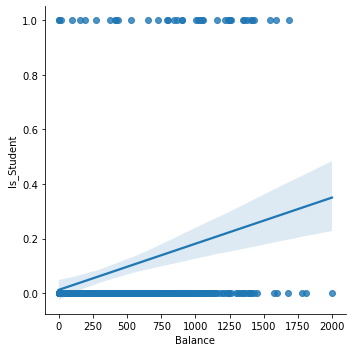

In [33]:
sns.lmplot(x="Balance", y="Is_Student", data=df)

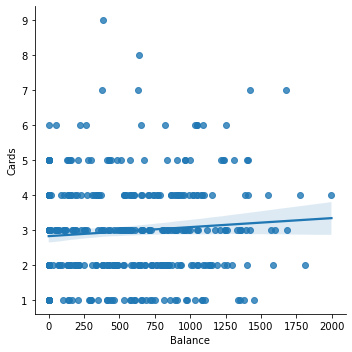

In [34]:
sns.lmplot(x="Balance", y="Cards", data=df)

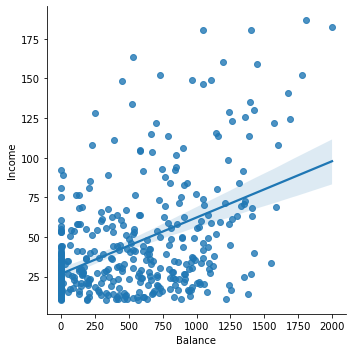

In [35]:
sns.lmplot(x="Balance", y="Income", data=df)

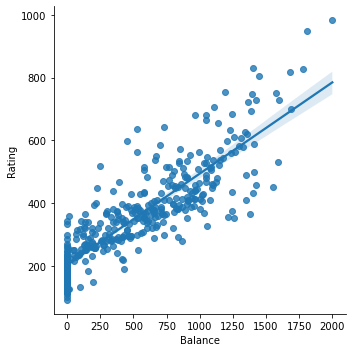

In [36]:
sns.lmplot(x="Balance", y="Rating", data=df)